In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine_data_df = pd.read_csv('./data/cleansingWine.csv', low_memory=False) # DtypeWarning: Columns (8,19,20) have mixed types. 나와서 low_memory=False 로 type 통일
print(wine_data_df.shape) # (21605, 32)
wine_data_df.head(5) 

(21605, 32)


,Unnamed: 0,id,name,producer,nation,local1,local2,local3,local4,varieties1,...,use,abv,degree,sweet,acidity,body,tannin,price,year,ml
0,0,137197,Altair,Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,...,Table,14~15,17~19,SWEET1,ACIDITY4,BODY5,TANNIN4,220000,2014,750
1,1,137198,"Altair, Sideral",Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,...,Table,14~15,16~18,SWEET1,ACIDITY3,BODY4,TANNIN4,110000,2016,750
2,2,137199,Baron du Val Red,Baron du Val,France,NaN,NaN,NaN,NaN,Carignan,...,Table,11~12,15~17,SWEET2,ACIDITY3,BODY2,TANNIN2,0,0,750
3,3,137200,Baron du Val White,Baron du Val,France,NaN,NaN,NaN,NaN,Carignan,...,Table,11~12,9~11,SWEET1,ACIDITY3,BODY2,TANNIN1,0,0,750
4,4,137201,"Benziger, Cabernet Sauvignon",Benziger,USA,California,NaN,NaN,NaN,Cabernet Sauvignon,...,Table,13~14,17~19,SWEET1,ACIDITY3,BODY3,TANNIN4,0,2003,750


In [15]:
wine_data_df = pd.DataFrame()


AttributeError: 'DataFrame' object has no attribute 'feature_names'

In [5]:
# 필요한 컬럼만 추출하여 새롭게 숫자형으로 변환
# 숫자 부분만 추출하여 새 컬럼으로 저장
wine_data_df['sweet_level'] = wine_data_df['sweet'].str.extract(r'(\d+)').fillna(0).astype(int)
wine_data_df['acidity_level'] = wine_data_df['acidity'].str.extract(r'(\d+)').fillna(0).astype(int)
wine_data_df['body_level'] = wine_data_df['body'].str.extract(r'(\d+)').fillna(0).astype(int)
wine_data_df['tannin_level'] = wine_data_df['tannin'].str.extract(r'(\d+)').fillna(0).astype(int)

# 변환 결과 확인
wine_data_df[['sweet', 'acidity', 'body', 'tannin', 'sweet_level', 'acidity_level', 'body_level', 'tannin_level']].head()

,sweet,acidity,body,tannin,sweet_level,acidity_level,body_level,tannin_level
0,SWEET1,ACIDITY4,BODY5,TANNIN4,1,4,5,4
1,SWEET1,ACIDITY3,BODY4,TANNIN4,1,3,4,4
2,SWEET2,ACIDITY3,BODY2,TANNIN2,2,3,2,2
3,SWEET1,ACIDITY3,BODY2,TANNIN1,1,3,2,1
4,SWEET1,ACIDITY3,BODY3,TANNIN4,1,3,3,4


In [6]:
selected_data = wine_data_df[['sweet_level', 'acidity_level', 'body_level', 'tannin_level']]

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(selected_data)

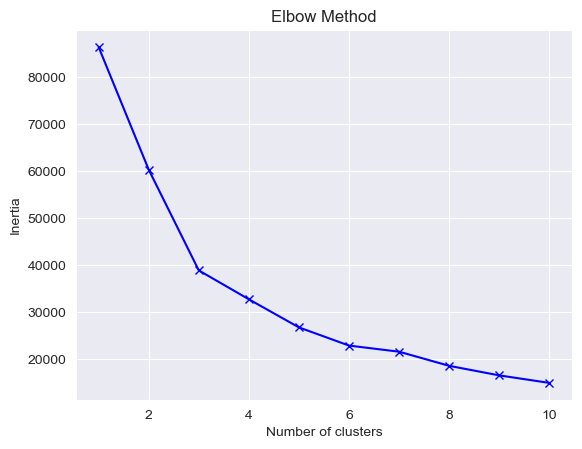

In [14]:
from sklearn.cluster import KMeans

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0, max_iter=300).fit(standardized_data)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [10]:
optimal_k = 3  # Use the value you find from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(standardized_data)

# Add cluster labels to the original data
wine_data_df['cluster'] = clusters
